<a href="https://colab.research.google.com/github/shyamsundar-v/Machine-Learning-Regression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Know info about data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# Lets convert Date column of dtype object to Datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# From the above we can say that there are no null values in the dataset

In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

In [ ]:
df.drop('Date',inplace=True,axis=1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
df.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Day                            int64
Month                          int64
Year                           int64
Weekday                       object
dtype: object

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000


# Let's go for the univariate-analysis

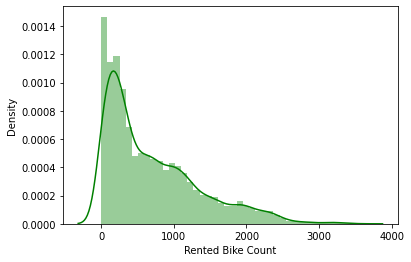

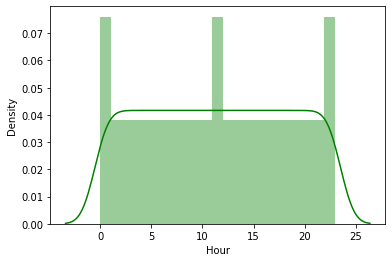

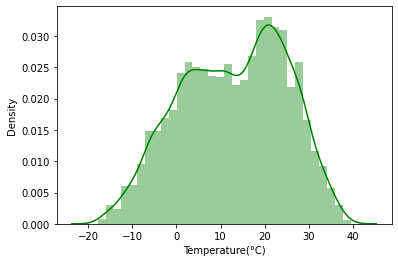

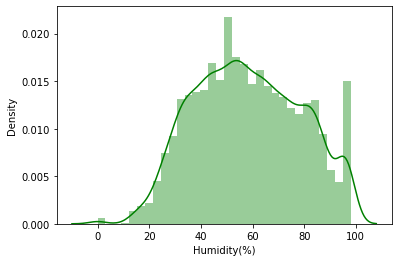

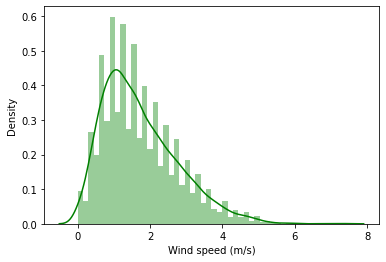

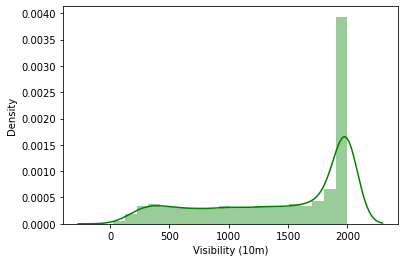

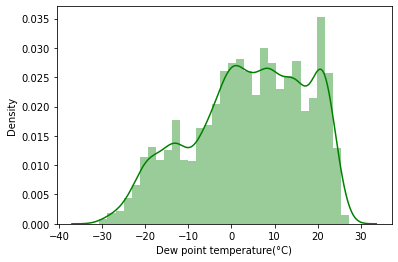

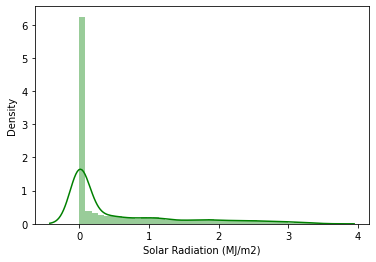

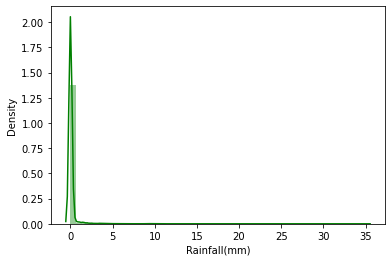

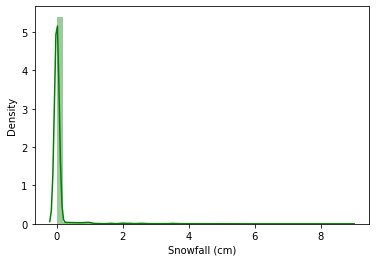

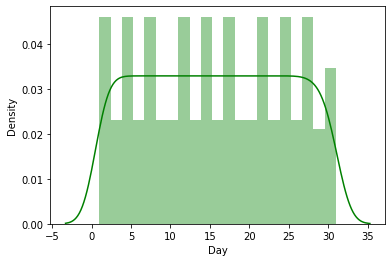

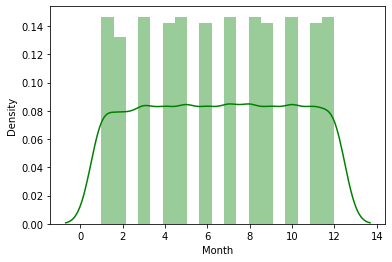

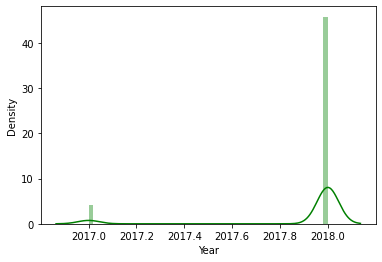

In [ ]:

for col in df.columns:
    if df[col].dtype=='int64' or df[col].dtype=='float64':
        sns.distplot(df[col],kde=True,color='g')
        plt.show()




# We can observe that the features 'Rented Bike Count', 'Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall' & 'Snowfall' features are not normaly distributed

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000


# 
-->From the above summary of the data we can observe that Solar Radiation, Rainfall & Snowfall values starts from 50% or more. Thus, we can converts this features into categorical features as 1 or 0 with condition on certain threshold value


In [ ]:
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].apply(lambda x : 1 if x>0.05 else 0)
df['Rainfall(mm)'] = df['Rainfall(mm)'].apply(lambda x: 1 if x > 0.14 else 0)
df['Snowfall (cm)'] = df['Snowfall (cm)'].apply(lambda x: 1 if x > 0.07 else 0)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
x=['Seasons','Holiday','Functioning Day']
for i in x:
    print(df[i].value_counts())
    print('*'*30)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
******************************
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
******************************
Yes    8465
No      295
Name: Functioning Day, dtype: int64
******************************


In [ ]:
df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'No' : 0, 'Yes' : 1})

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,0,1,12,1,2017,Thursday


In [ ]:
## Defining a function for plotting a bargraph
def barplot(x, y, hue):
    plt.figure(figsize=(10,6))
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.legend()
    plt.show();

# Let's check Multivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


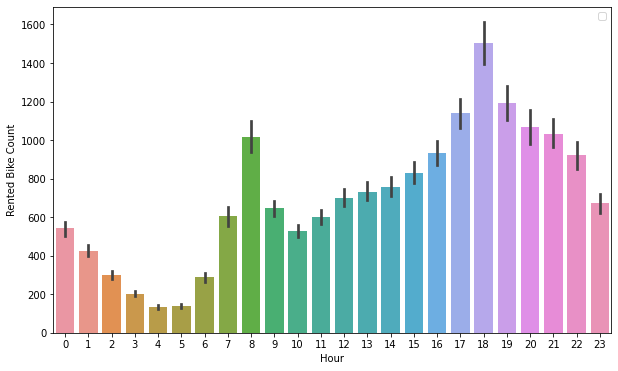

In [ ]:
barplot('Hour','Rented Bike Count',None)

# 
--> From the above plot we can observe that most of the bikes rented between 17:00 hrs -- 21:00hrs followed by 8:00hrs

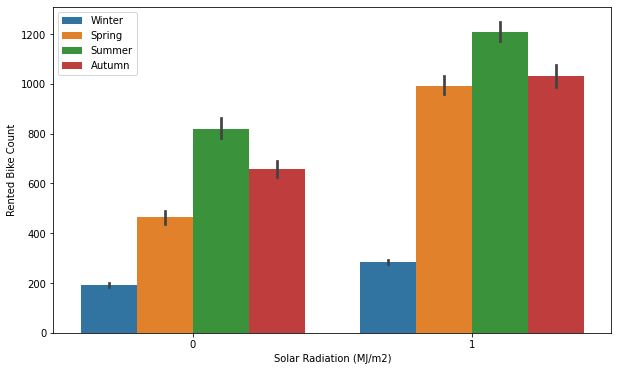

In [ ]:
barplot('Solar Radiation (MJ/m2)','Rented Bike Count','Seasons')

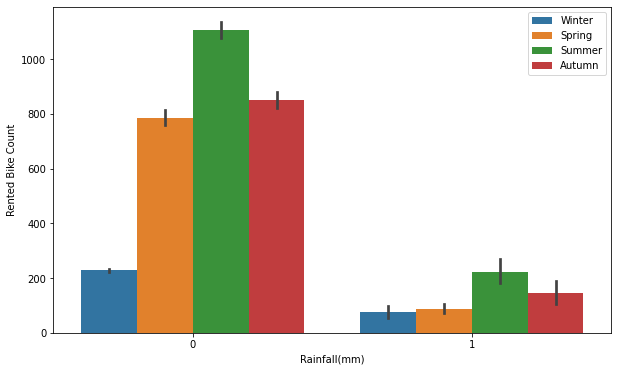

In [ ]:
barplot('Rainfall(mm)','Rented Bike Count','Seasons')

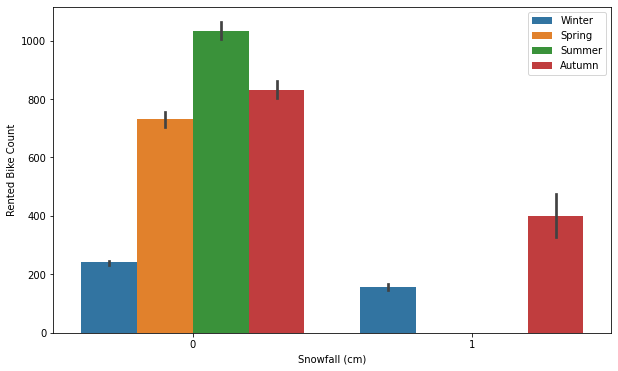

In [ ]:
barplot('Snowfall (cm)','Rented Bike Count','Seasons')


# 
--> From the above plots we can conclude that compared to Solar Radiation, the features rainfall and snowfall has a drastic effect on the bikes rented

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


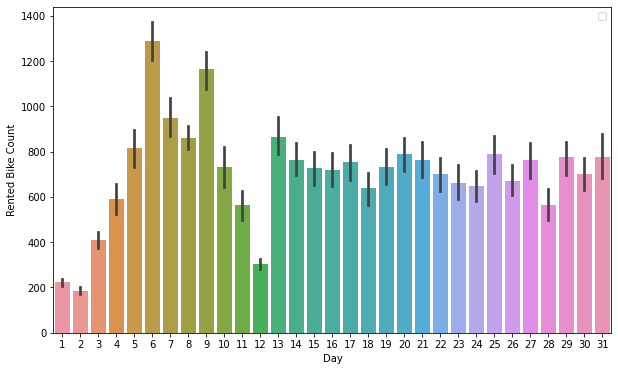

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


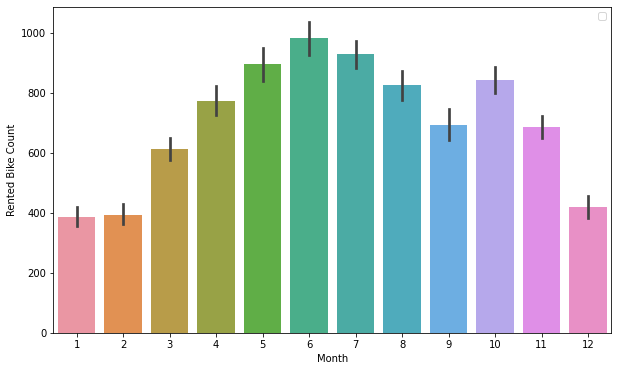

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


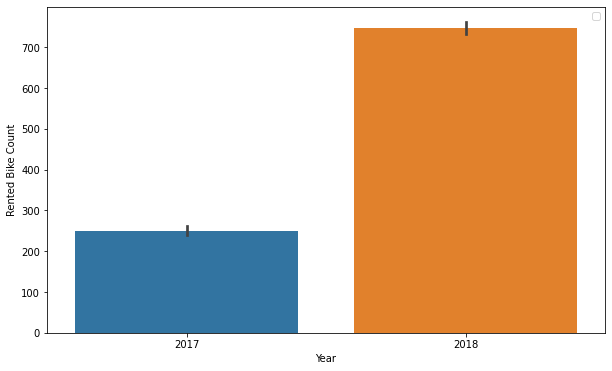

In [ ]:
x = ['Day','Month','Year']
for i in x:
    barplot(i,'Rented Bike Count',None)

# 

--> Majority of the bikes rented between the days 6-9 of the month and lowes is on ist and 2nd of the month and the reamaing days are more or less similar on the count.

--> The bikes rented is maximun on the months 5 to 8 which is the summer season and lowest is on jan,feb and december.

--> The only thing that we can observe clearly from the above 3 plots is that most of bikes rented in 2018 compared to 2017 which is less that 60%

-->  So  to uderstand is much better plot the above using hue

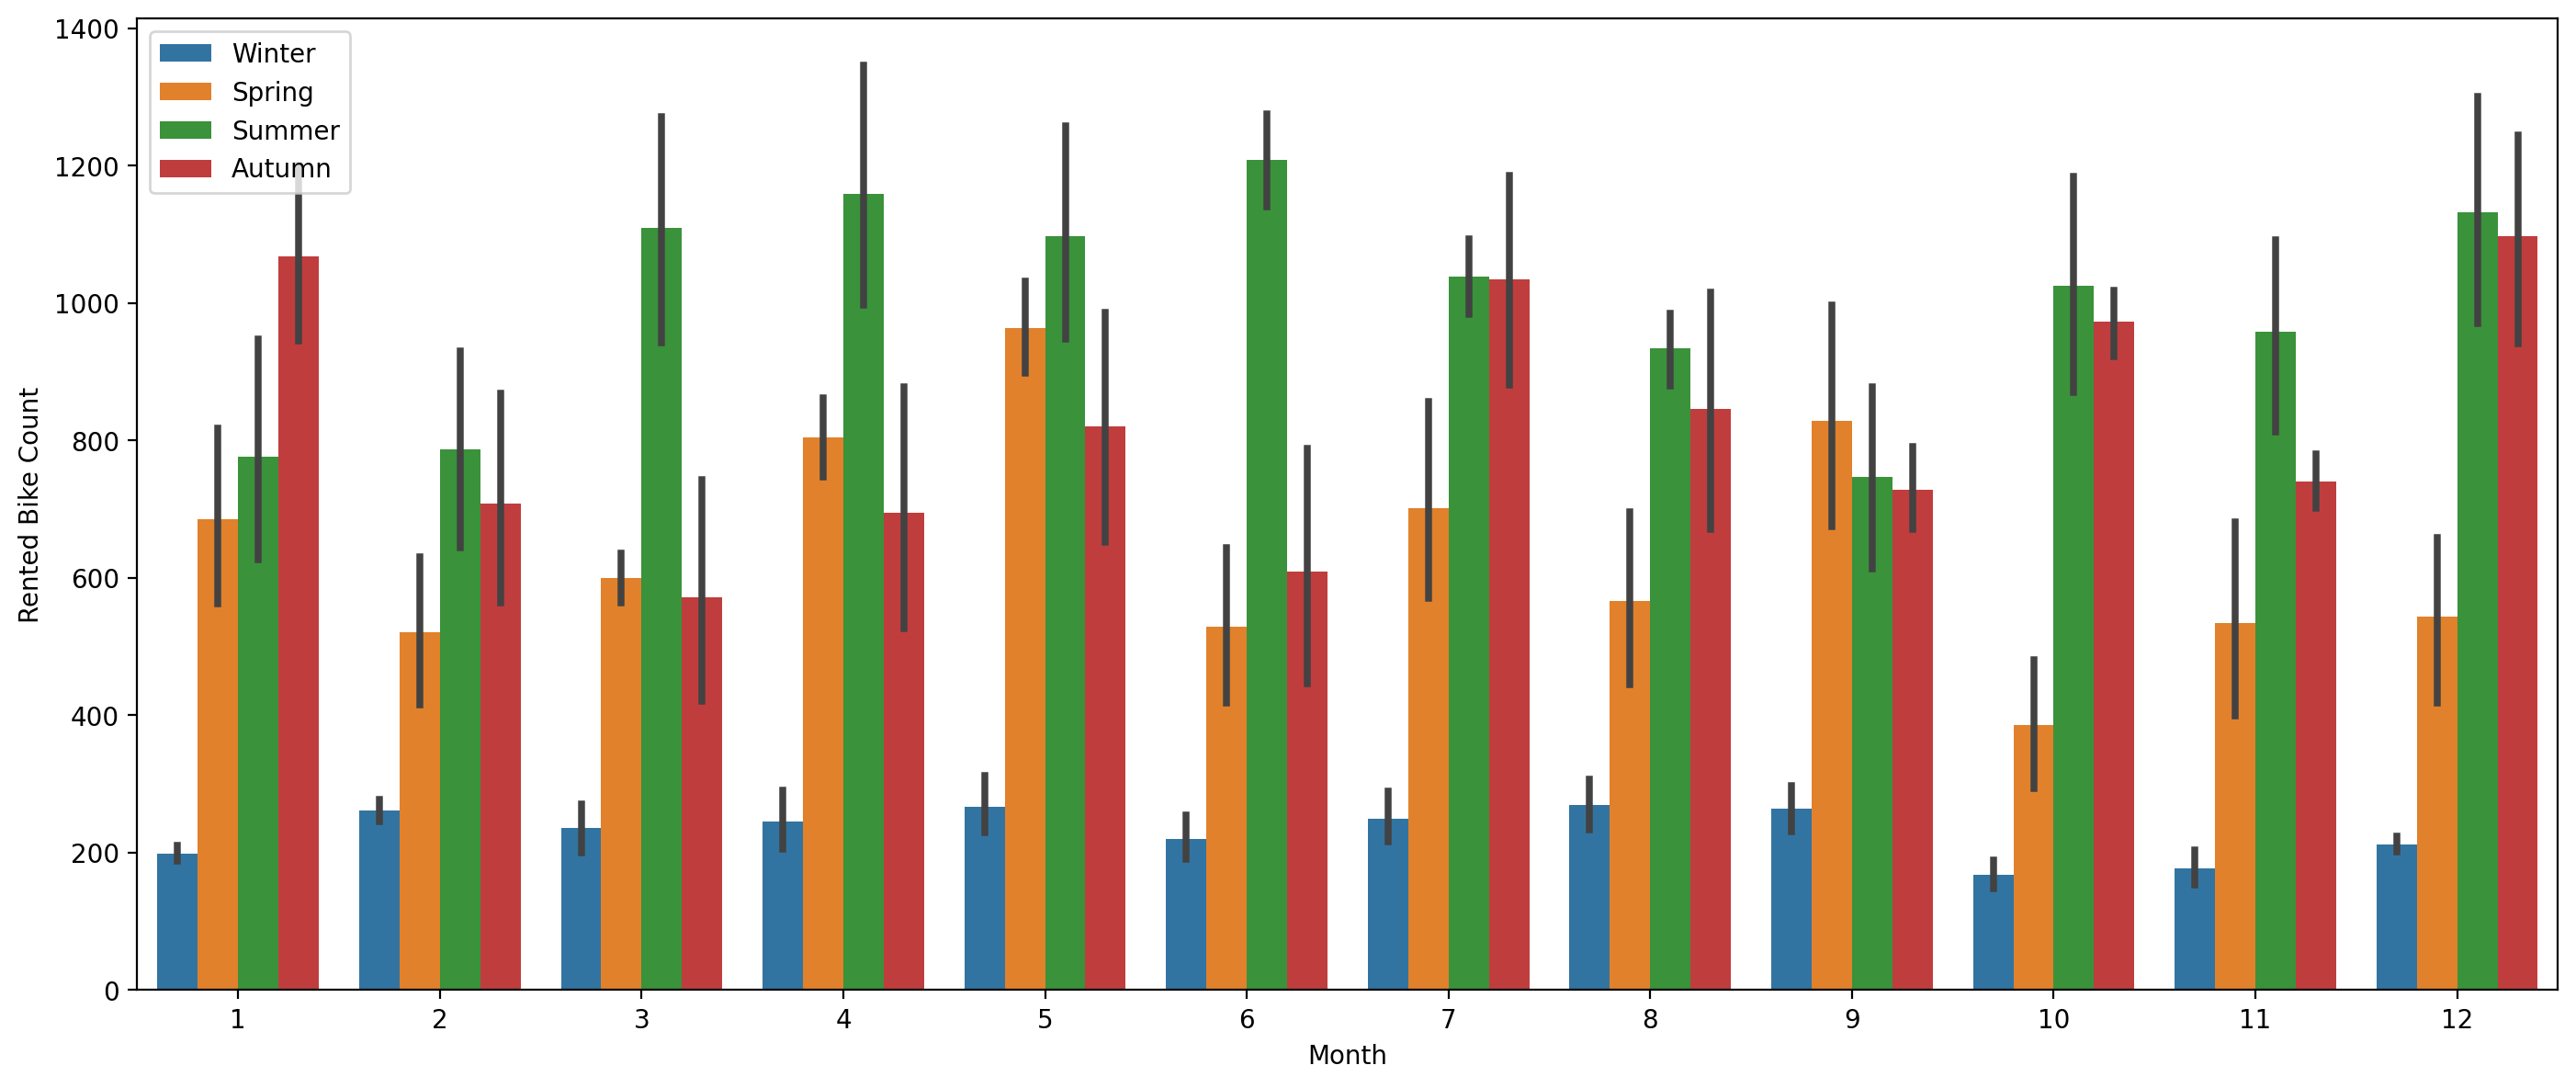

In [ ]:
plt.figure(figsize=(17,7),dpi=200)
sns.barplot(x='Month',y='Rented Bike Count',data=df,hue=df['Seasons'])
plt.legend()
plt.show()

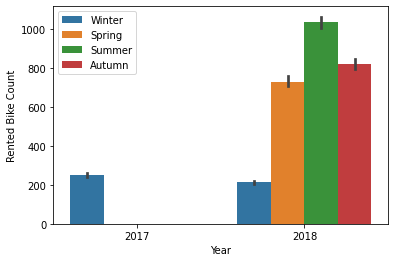

In [ ]:
#plt.figure(figsize=(17,7),dpi=200)
sns.barplot(x='Year',y='Rented Bike Count',data=df,hue=df['Seasons'])
plt.legend()
plt.show()

#
--> From the above both plots we can observe that 'Winter' season is the only season in which there is no much deviations on the number of bikes rented through out the year and also in the year 2017 bikes was rented only in the winter season itself. So from the above we can say that Bikes rented will not affect in any month in the Winter season.

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

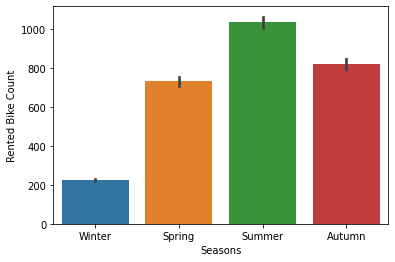

In [ ]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

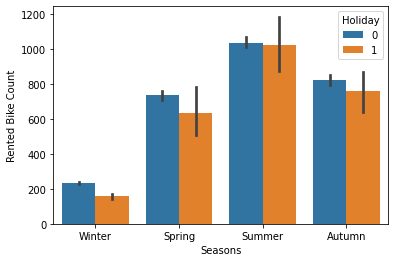

In [ ]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=df,hue=df['Holiday'])

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

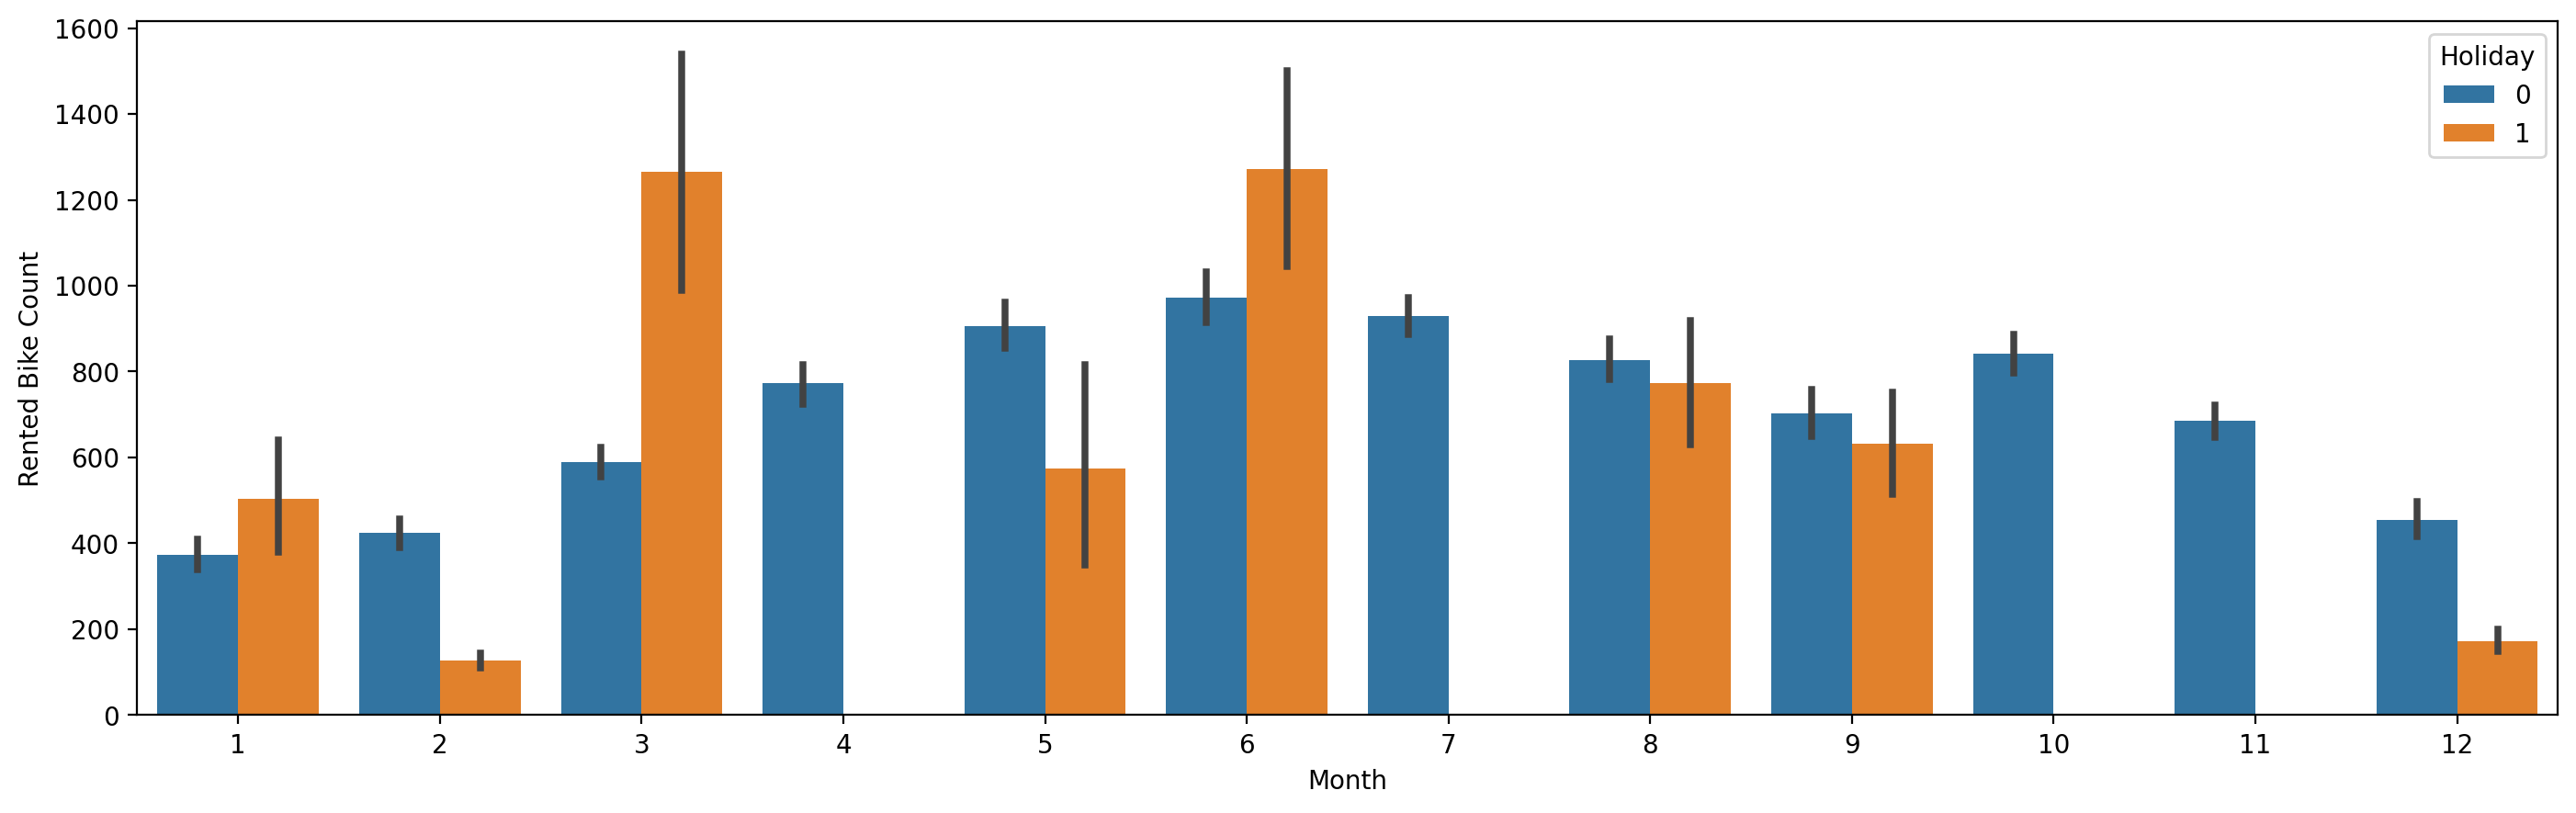

In [ ]:
plt.figure(figsize=(17,5),dpi=200)
sns.barplot(x='Month',y='Rented Bike Count',data=df,hue=df['Holiday'])

#
  --> From the above plots, there is a clear domination of summer season compared to the others in count of  bbikes rented. Also that there is not much difference between the count of bikes rented on holidays and non holidays but majority of the bikes rented on the Holidays but only in the summer season that number of bikes rented on non holidays is a bit high than holidays 
  
  --> In the months of April,July,October and November there is not even a single bike that was rented on non holidays

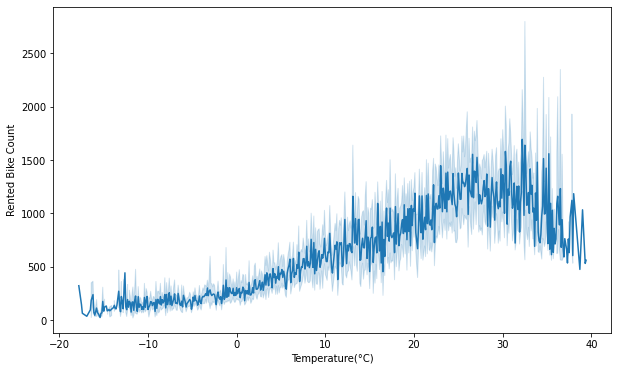

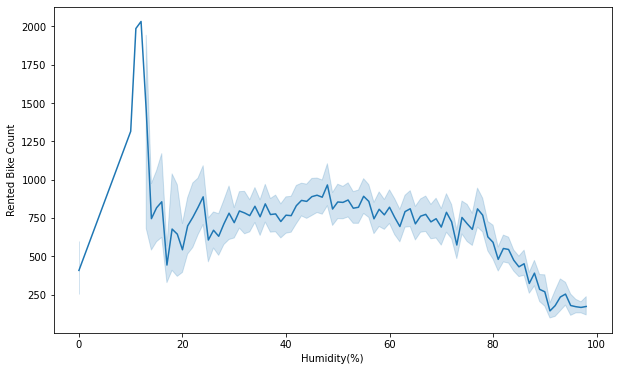

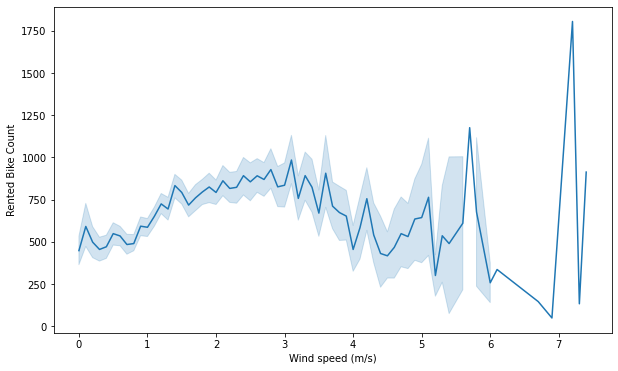

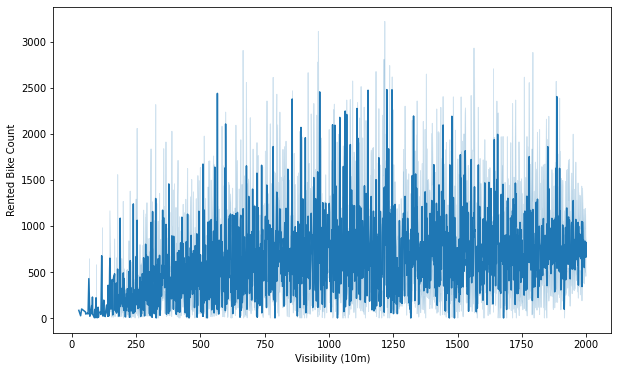

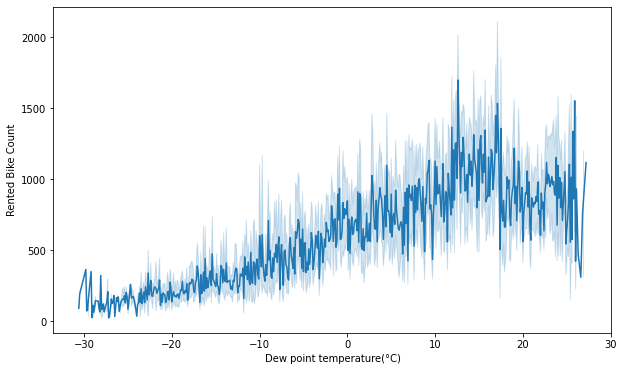

In [ ]:
continuous_features = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(°C)']
for col in continuous_features:
    plt.figure(figsize=(10,6))
    sns.lineplot(x=col,y='Rented Bike Count',data=df,palette='Grouped')

# 
--> From the above line plots We can obsrrve that, with the increase in temperature there is a increase in rented bike counts also more number of bikes are rented when the  humidity is low i.e Between 10% - 18% and from 20% humidity onwards, rented bike counts stats decreasing , Also higher the windspeed which is more than 5 m/s than there is higher the number of rented bike counts. Visibility generally don't have much impact but the number of rented bikes are less if there's low visibility. Thus visibility must be more than 600 (10 m) for getting more number of bikes rented. Dew point remperature is linearly related to rented bike count as  the dew point temperature is high , higher the number of bikes rented.

# Let's check of correlation between the features 

<AxesSubplot:>

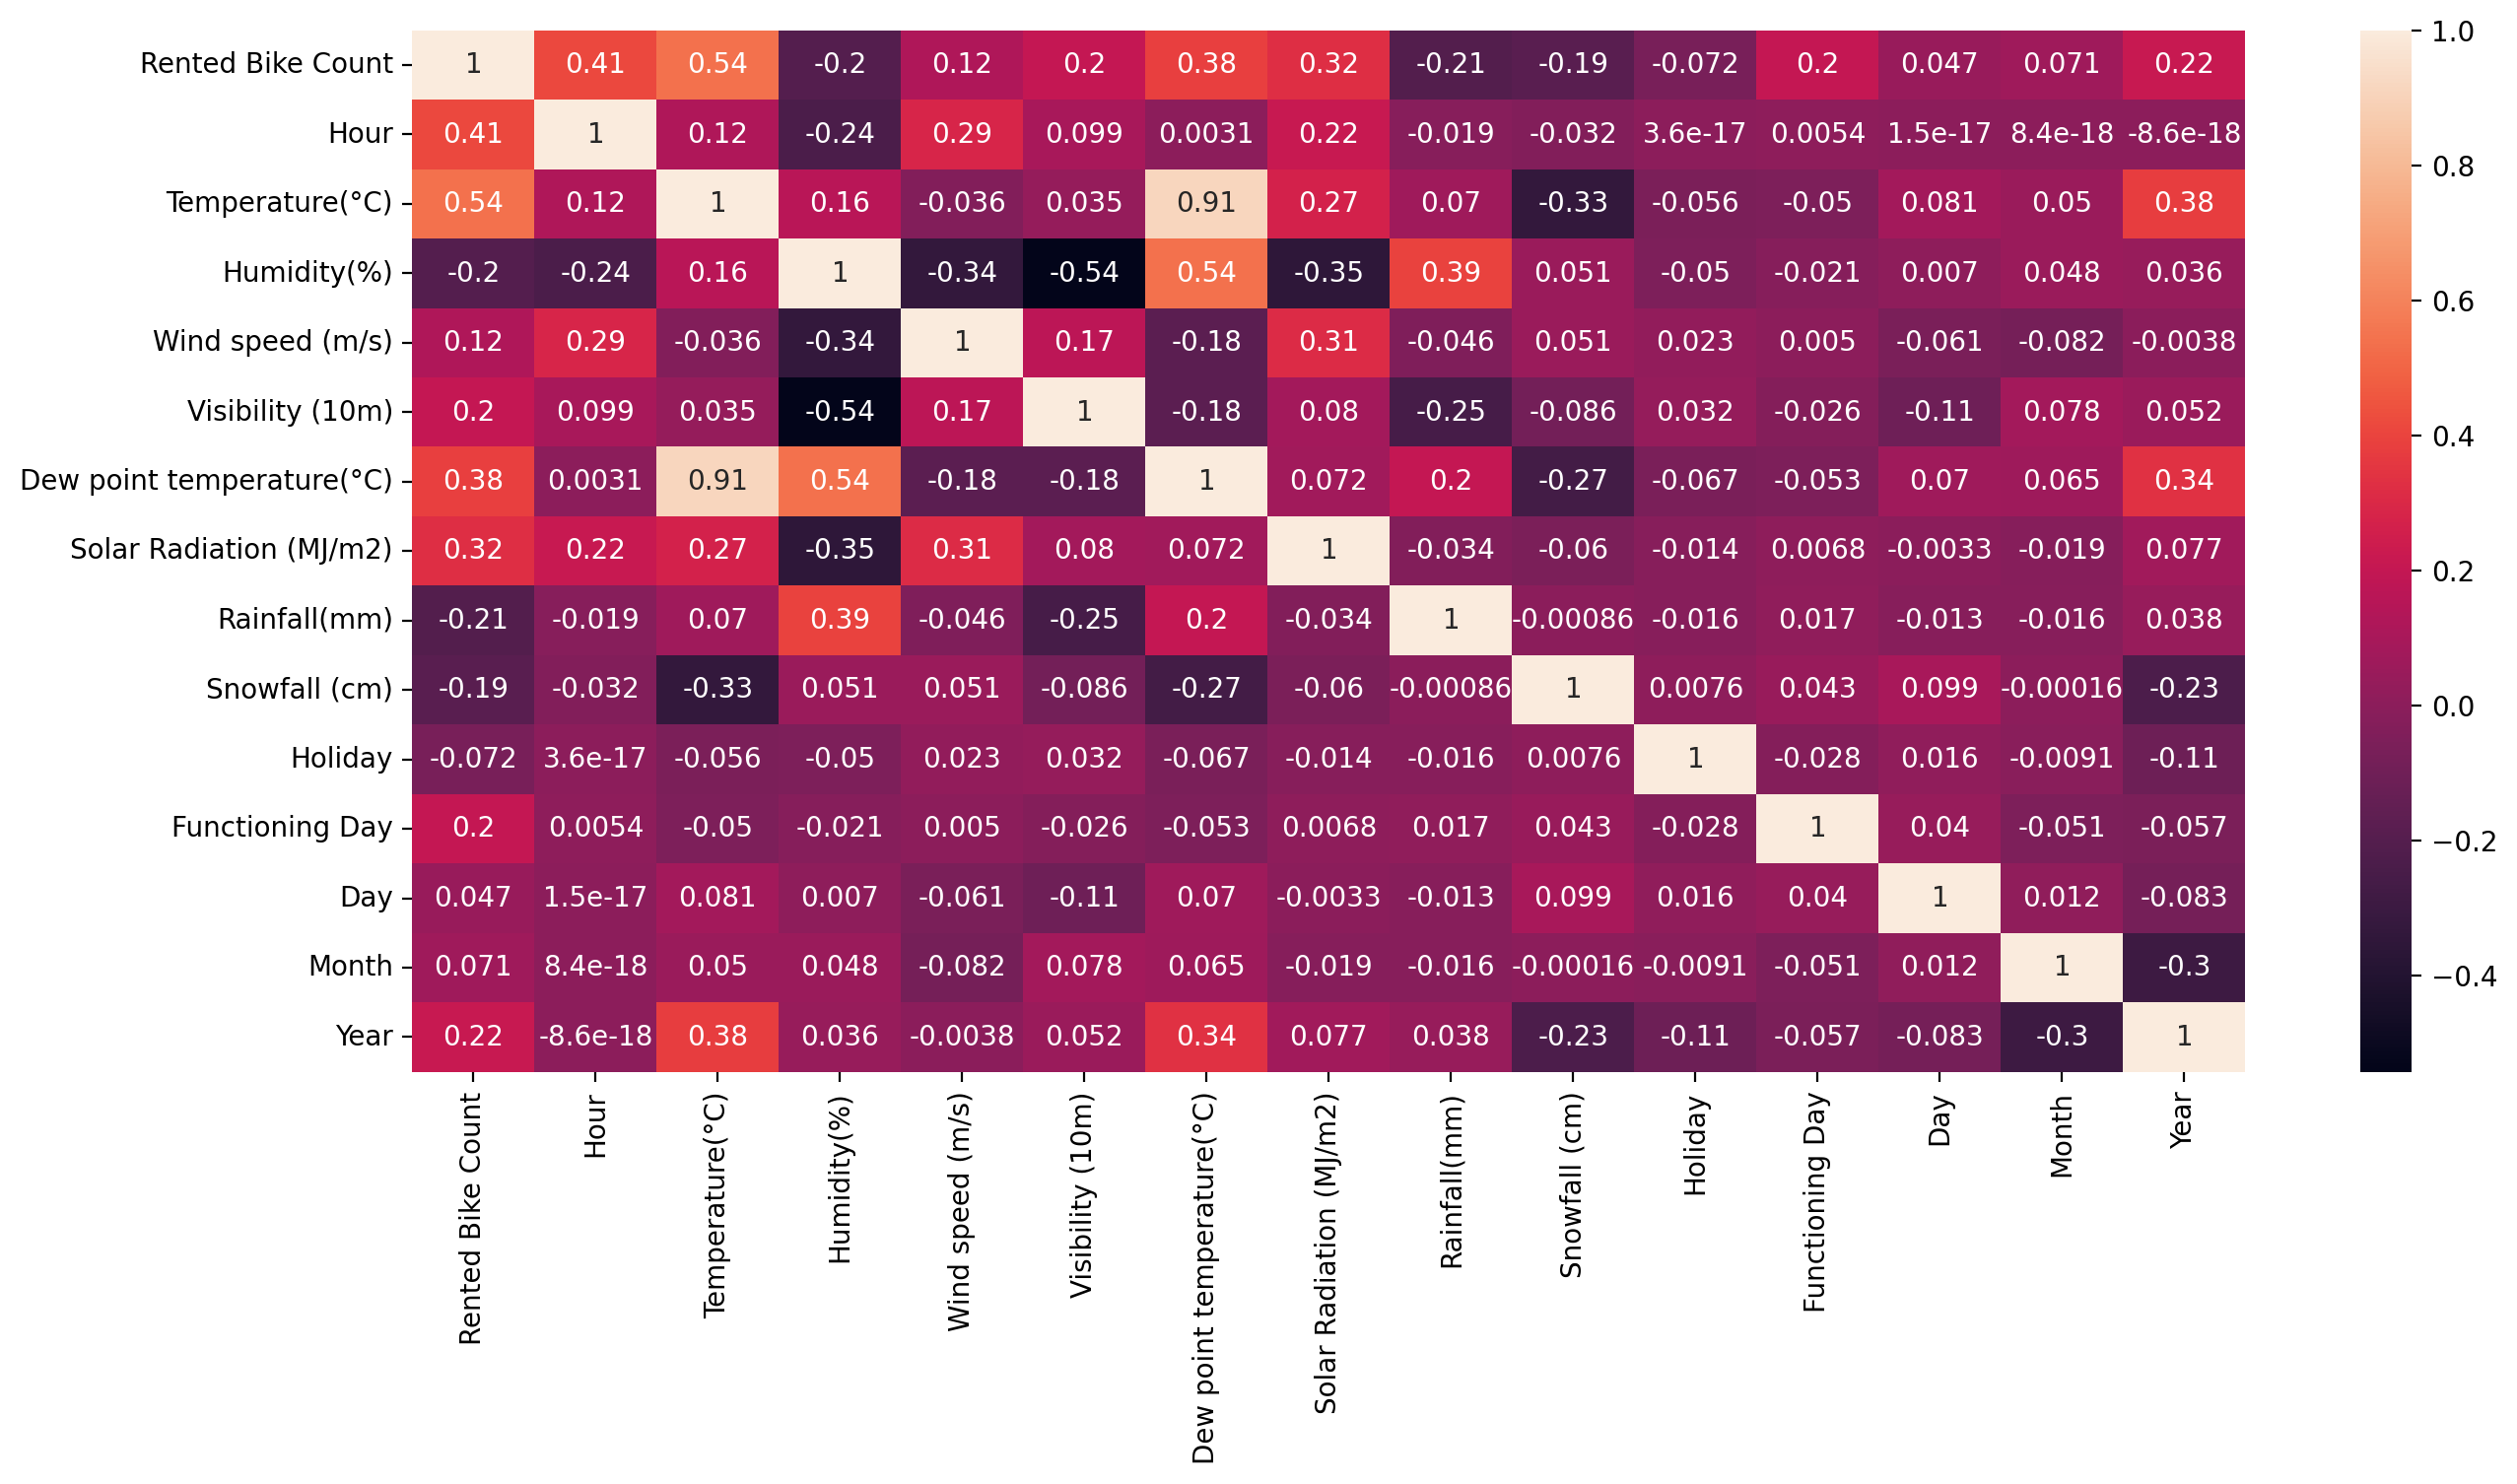

In [ ]:
plt.figure(figsize=(15,7),dpi=200)
sns.heatmap(df.corr(),annot=True)

# 
--> As the correlation between the features 'Dew point temperature(°C)' and 'Temperature(°C)' is very high so it's better to drop one of the feature.

In [ ]:
df = df.drop('Dew point temperature(°C)',axis=1)

<AxesSubplot:>

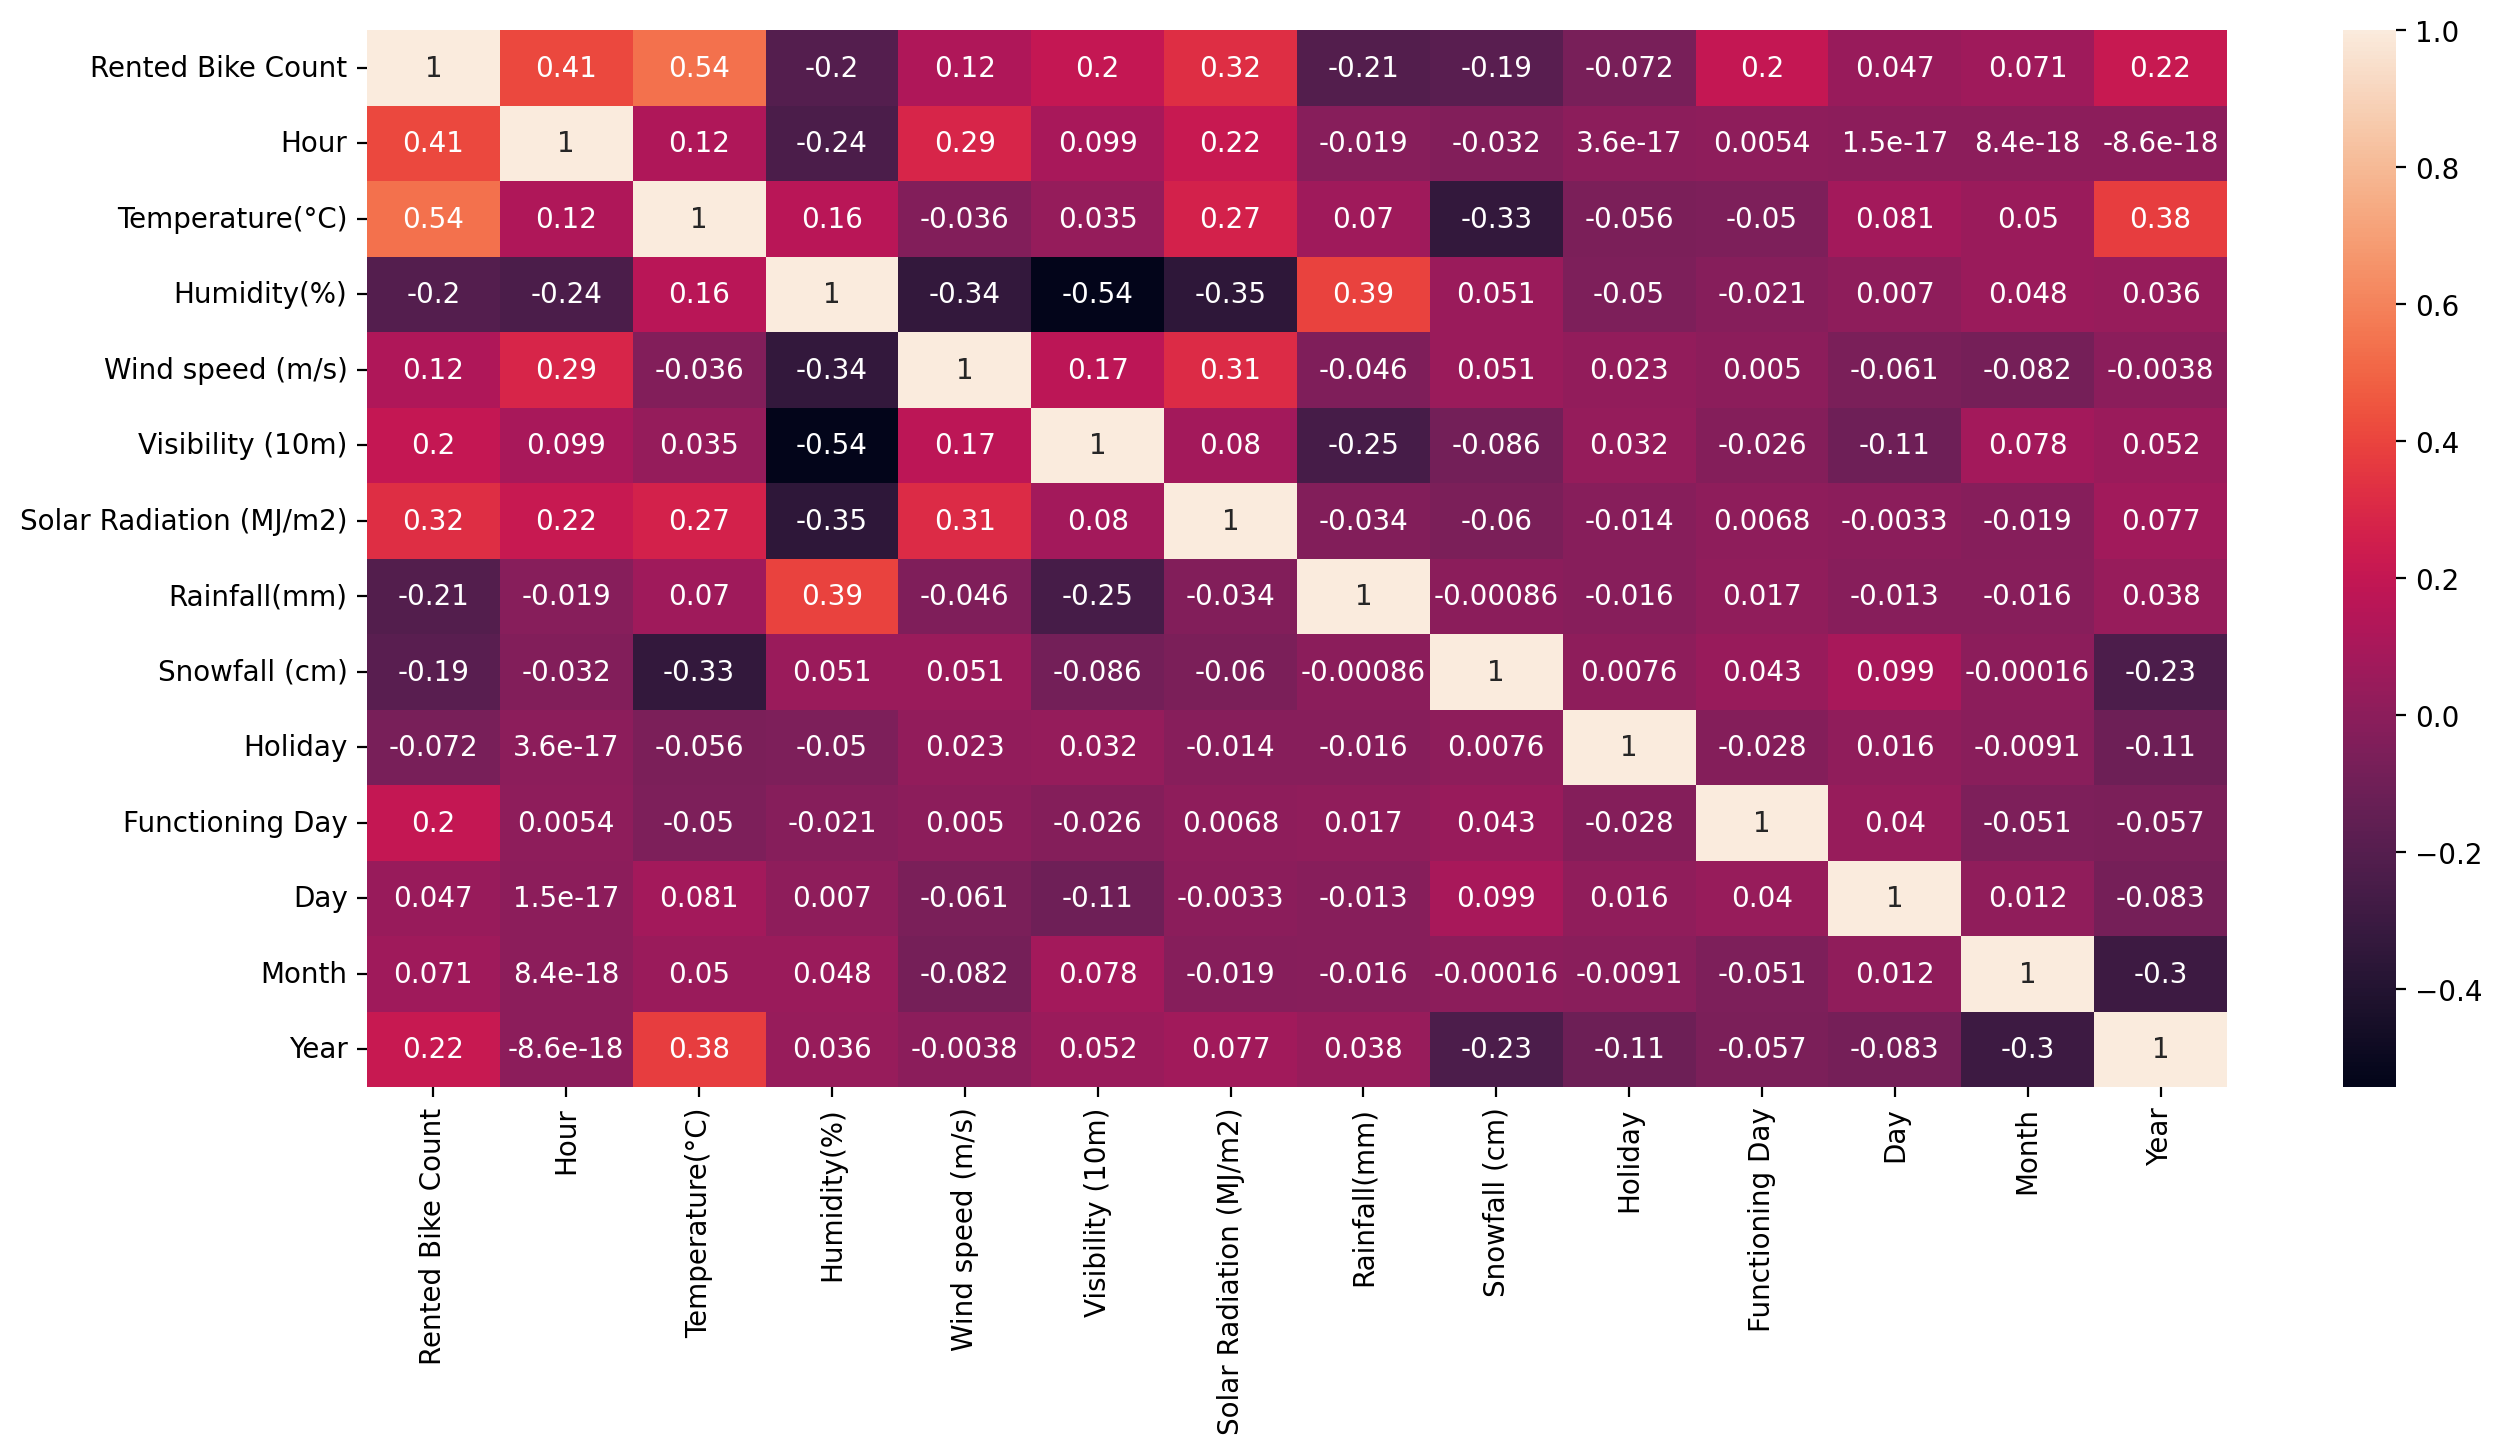

In [ ]:
plt.figure(figsize=(15,7),dpi=200)
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.var()

Rented Bike Count          416021.733390
Hour                           47.922137
Temperature(°C)               142.678850
Humidity(%)                   414.627875
Wind speed (m/s)                1.073918
Visibility (10m)           370027.323001
Solar Radiation (MJ/m2)         0.248856
Rainfall(mm)                    0.052001
Snowfall (cm)                   0.048019
Holiday                         0.046888
Functioning Day                 0.032545
Day                            77.382795
Month                          11.889036
Year                            0.077727
dtype: float64

#
--> As of now the variance between some features are very high these may be because of range of data i their respective columns so let's leave this for now and check for multicolliniarity after scaling the features.

# Feature Engineering

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,0,0,0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,0,0,0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,0,0,0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,0,0,0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,0,0,0,Winter,0,1,12,1,2017,Thursday


In [ ]:
df1 = df.copy()

In [ ]:
df = pd.get_dummies(df, columns = ['Seasons', 'Year', 'Weekday'])

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0


# Models and Evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
X = df.drop('Rented Bike Count', axis = 1)
y = df['Rented Bike Count']

In [ ]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,0,-5.2,37,2.2,2000,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,1,-5.5,38,0.8,2000,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
2,2,-6.0,39,1.0,2000,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
3,3,-6.2,40,0.9,2000,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
4,4,-6.0,36,2.3,2000,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [ ]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

# 1. Linear Regression 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE :',RMSE)
print('*'*30)
r2 = r2_score(y_test,y_pred)
print('r2_score :',r2)
print('*'*30)
#adjusted_r2_score = 1-(1-r2_score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2_score = 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adjusted_r2_score :',adjusted_r2_score)
#1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

RMSE : 427.45502441575076
******************************
r2_score : 0.5634218965980681
******************************
adjusted_r2_score : 0.557098343536047


In [ ]:
print('Training Score :',lm.score(X_train,y_train))
print('Testing Score :',lm.score(X_test,y_test))

Training Score : 0.5739155717626577
Testing Score : 0.5634218965980681


Text(0, 0.5, 'Actual')

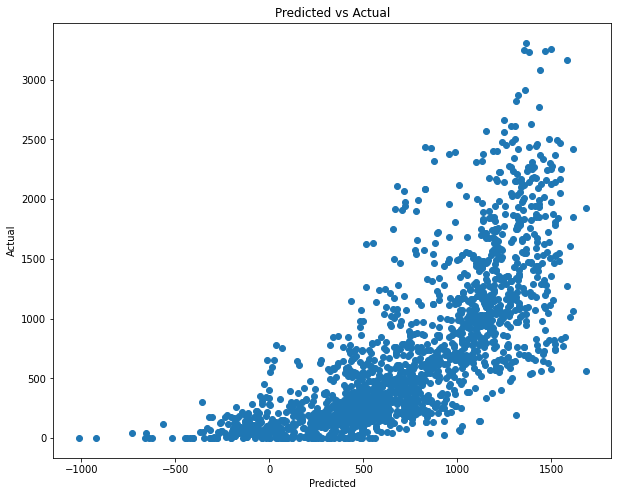

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Residual Analysis

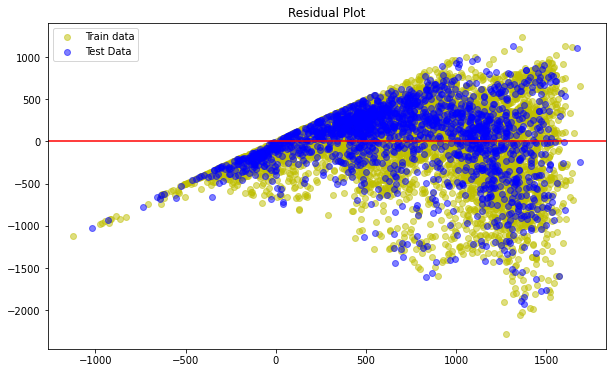

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(lm.predict(X_train),(lm.predict(X_train)-y_train),label='Train data',color='y',alpha=0.5)

plt.scatter(lm.predict(X_test),(y_pred-y_test),label='Test Data',color='blue',alpha=0.5)
plt.axhline(y=0,c="r")
plt.title('Residual Plot')


plt.legend()

# 
--> Conclusions:-

    1. As there is no much difference the training and test score we can say that the model is not Overfitting.
    
    2. As the r2 score id less that 0.7 we can say that liner model is not a good fit to the data.
    
    3. From the residual analysis the data is not randomly distributed over the axis line so we can say that the model is          not a good fit to the data.

# 2.Ridge Regression using GridSearch

In [ ]:
ridge=Ridge()

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                    0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ],
         'max_iter':[100,200,400,600,800,1000]}

In [ ]:
grid = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',
                    cv=5,return_train_score=True,verbose = 1)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'max_iter': [100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
grid.best_params_

{'alpha': 500, 'max_iter': 100}

In [ ]:
grid.best_score_

-319.5813199905447

In [ ]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

In [ ]:
#print('Mean_absolute_error_train  :',mean_absolute_error(y_train,y_train_pred))
print('Mean_absolute_error_  :',mean_absolute_error(y_test,y_test_pred))
print('*'*30)
#print('Mean_squared_error_train  :',mean_squared_error(y_train,y_train_pred))
print('Mean_squared_error  :',mean_squared_error(y_test,y_test_pred))
print('*'*30)
#print('Root_Mean_squared_error_train  :',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Root_Mean_squared_error  :',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('*'*30)
print('r2_score:',r2_score(y_test,y_test_pred))
print('*'*30)
adjusted_r2_score = 1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adjusted_r2_score :',adjusted_r2_score)

Mean_absolute_error_  : 324.37271038984244
******************************
Mean_squared_error  : 184066.15306167104
******************************
Root_Mean_squared_error  : 429.0293149211031
******************************
r2_score: 0.5602001943516479
******************************
adjusted_r2_score : 0.5538299770044818


In [ ]:
print('Training Score :',grid.score(X_train,y_train))
print('Testing Score :',grid.score(X_test,y_test))

Training Score : -318.4875873965022
Testing Score : -324.37271038984244


Text(0, 0.5, 'Actual')

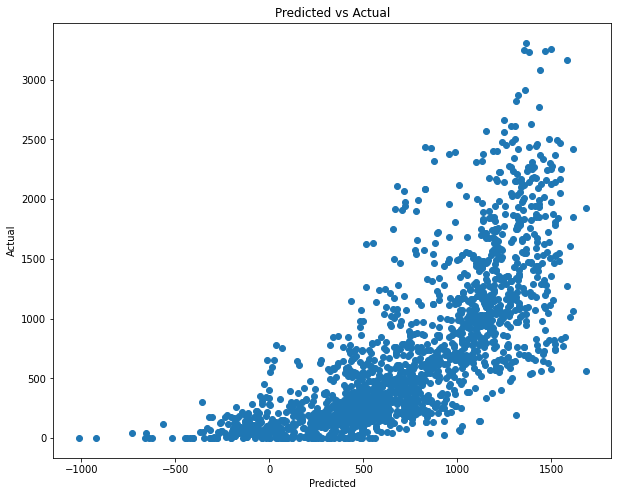

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3.Lasso Regression using GridSearch

In [ ]:
lasso= Lasso()

In [ ]:
grid2 = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',
                    cv=5,return_train_score=True,verbose = 1)

In [ ]:
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'max_iter': [100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
grid2.best_params_

{'alpha': 20, 'max_iter': 100}

In [ ]:
grid2.best_score_

-317.9185040946537

In [ ]:
y_train_pred = grid2.predict(X_train)
y_test_pred = grid2.predict(X_test)

In [ ]:

print('Mean_absolute_error_  :',mean_absolute_error(y_test,y_test_pred))
print('*'*30)

print('Mean_squared_error  :',mean_squared_error(y_test,y_test_pred))
print('*'*30)

print('Root_Mean_squared_error  :',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('*'*30)

print('r2_score:',r2_score(y_test,y_test_pred))
print('*'*30)
adjusted_r2_score = 1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adjusted_r2_score :',adjusted_r2_score)

Mean_absolute_error_  : 324.66562088424143
******************************
Mean_squared_error  : 187330.96544708882
******************************
Root_Mean_squared_error  : 432.817473592609
******************************
r2_score: 0.55239939106054
******************************
adjusted_r2_score : 0.5459161840944413


In [ ]:
print('Training Score :',grid2.score(X_train,y_train))
print('Testing Score :',grid2.score(X_test,y_test))

Training Score : -317.26859233340554
Testing Score : -324.66562088424143


Text(0, 0.5, 'Actual')

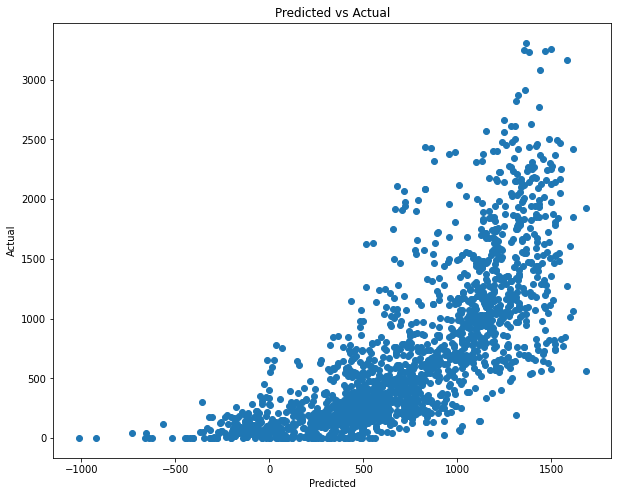

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 4.ElasticNet Regression using GridSearch

In [ ]:
elasticnet= ElasticNet()

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                    0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ],
         'l1_ratio':[0.5,0.6,0.7,0.8,0.9,1],'max_iter':[100,200,400,600,800,1000]}

In [ ]:
grid_3 = GridSearchCV(estimator = elasticnet,param_grid = params,scoring= 'neg_mean_absolute_error',
                   cv=5,return_train_score=True,verbose = 1)

In [ ]:
grid_3.fit(X_train,y_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'l1_ratio': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'max_iter': [100, 200, 400, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
grid_3.best_params_

{'alpha': 20, 'l1_ratio': 1, 'max_iter': 100}

In [ ]:
grid_3.best_score_

-317.9185040946537

In [ ]:
y_train_pred = grid2.predict(X_train)
y_test_pred = grid2.predict(X_test)

In [ ]:
print('Mean_absolute_error_  :',mean_absolute_error(y_test,y_test_pred))
print('*'*30)

print('Mean_squared_error  :',mean_squared_error(y_test,y_test_pred))
print('*'*30)

print('Root_Mean_squared_error  :',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('*'*30)

print('r2_score:',r2_score(y_test,y_test_pred))
print('*'*30)
adjusted_r2_score = 1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adjusted_r2_score :',adjusted_r2_score)

Mean_absolute_error_  : 324.66562088424143
******************************
Mean_squared_error  : 187330.96544708882
******************************
Root_Mean_squared_error  : 432.817473592609
******************************
r2_score: 0.55239939106054
******************************
adjusted_r2_score : 0.5459161840944413


In [ ]:
print('Training Score :',grid2.score(X_train,y_train))
print('Testing Score :',grid2.score(X_test,y_test))

Training Score : -317.26859233340554
Testing Score : -324.66562088424143


Text(0, 0.5, 'Actual')

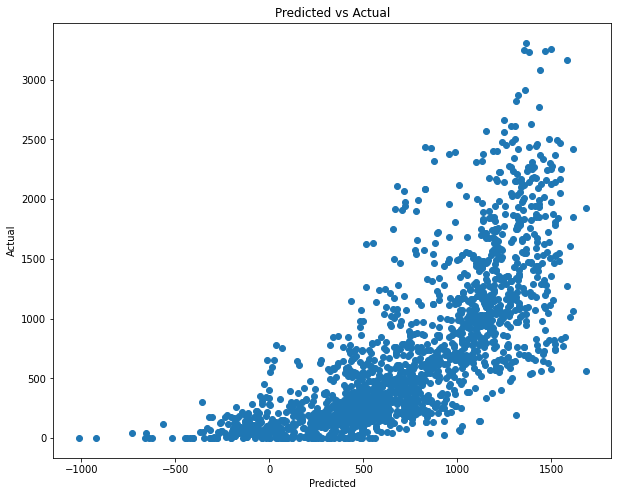

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 
--> Conclusions:-
    
    1. From the above three Ridge,Lasso,Elastic Net Regression we can observe that there is no muct difference between the        training and test score for all the 3 models. So that we can say that our models are not over fitting.
    
    2. R2_score of Ridge is slightly better compared to that lasso and Ev models but overall noneof them have r2_score            above 0.7.

# 5.RandomForestRegressor using GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = np.arange(10,120,12) # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf = RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,cv = 5, verbose=1, random_state=0, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  70,  82,  94, 106, 118]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=0, verbose=1)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 22,
 'bootstrap': False}

In [ ]:
model_rs = RandomForestClassifier(n_estimators= 100,max_depth=22, max_features= 'sqrt',min_samples_leaf= 1,
                                  min_samples_split=6,bootstrap=False)

In [ ]:
model_rs.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=22, max_features='sqrt',
                       min_samples_split=6)

In [ ]:
y_pred = model_rs.predict(X_test)

In [ ]:
print('Mean_absolute_error_  :',mean_absolute_error(y_test,y_pred))
print('*'*30)

print('Mean_squared_error  :',mean_squared_error(y_test,y_pred))
print('*'*30)

print('Root_Mean_squared_error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('*'*30)

print('r2_score:',r2_score(y_test,y_pred))
print('*'*30)
adjusted_r2_score = 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adjusted_r2_score :',adjusted_r2_score)

Mean_absolute_error_  : 187.52397260273972
******************************
Mean_squared_error  : 96080.62785388128
******************************
Root_Mean_squared_error  : 309.9687530282388
******************************
r2_score: 0.7704290508937255
******************************
adjusted_r2_score : 0.7671038633342487


Text(0, 0.5, 'Actual')

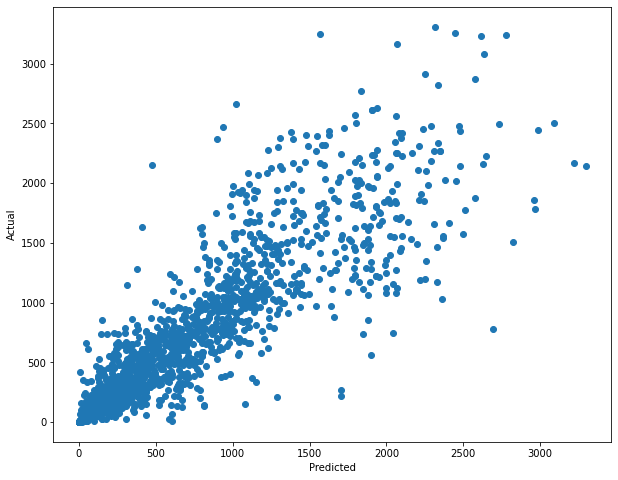

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 6.GradientBoostingRegressor

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],'max_depth'    : [4,6,8,10]}

gbr = GradientBoostingRegressor()

gbr_random = RandomizedSearchCV(estimator = gbr,param_distributions = parameters, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [ ]:
gbr_model = gbr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
gbr_random.best_params_

{'subsample': 0.9, 'n_estimators': 1500, 'max_depth': 8, 'learning_rate': 0.04}

In [ ]:
gbr_final_model = GradientBoostingRegressor(learning_rate = 0.04, subsample = 0.9, n_estimators = 1500, max_depth = 8)
gbr_final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=1500,
                          subsample=0.9)

In [ ]:
y_pred = gbr_final_model.predict(X_test)

In [ ]:
print('Mean_absolute_error_  :',mean_absolute_error(y_test,y_pred))
print('*'*30)

print('Mean_squared_error  :',mean_squared_error(y_test,y_pred))
print('*'*30)

print('Root_Mean_squared_error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('*'*30)

print('r2_score:',r2_score(y_test,y_pred))
print('*'*30)

adjusted_r2_score = 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('adjusted_r2_score :',adjusted_r2_score)

Mean_absolute_error_  : 97.22561617767961
******************************
Mean_squared_error  : 29732.296528836705
******************************
Root_Mean_squared_error  : 172.430555670498
******************************
r2_score: 0.9289589203807591
******************************
adjusted_r2_score : 0.9279299360293796


Text(0, 0.5, 'Actual')

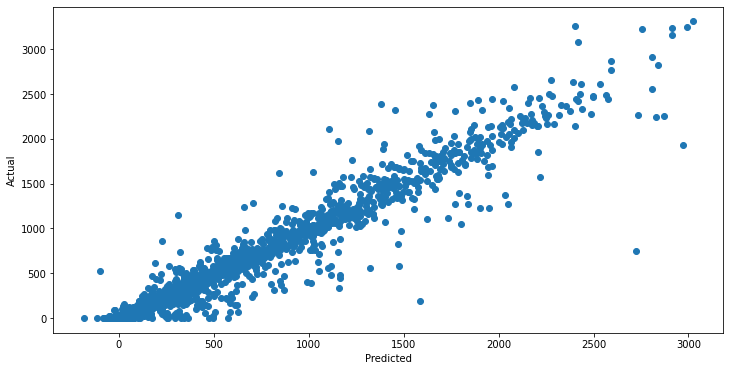

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance

In [ ]:
featureimp = pd.Series(gbr_final_model.feature_importances_,index=X.columns)

In [ ]:
len(gbr_final_model.feature_importances_)

25

In [ ]:
len(X.columns)

25

In [ ]:
top_10_imp_features=featureimp.nlargest(10).index
top_10_imp_features= list(top_10_imp_features)
top_10_imp_features

['Temperature(°C)',
 'Hour',
 'Humidity(%)',
 'Functioning Day',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Seasons_Autumn',
 'Day',
 'Visibility (10m)',
 'Month']

In [ ]:
featureimpdf = pd.DataFrame(featureimp,index=X.columns)
featureimpdf.columns=['feature_coorelation']
featureimpdf.sort_values('feature_coorelation')

,feature_coorelation
Year_2017,0.000181
Year_2018,0.000210
Snowfall (cm),0.000237
Weekday_Tuesday,0.001509
Weekday_Wednesday,0.001555
Seasons_Summer,0.001710
Weekday_Friday,0.001926
Weekday_Thursday,0.001988
Seasons_Spring,0.002681
Weekday_Monday,0.002938


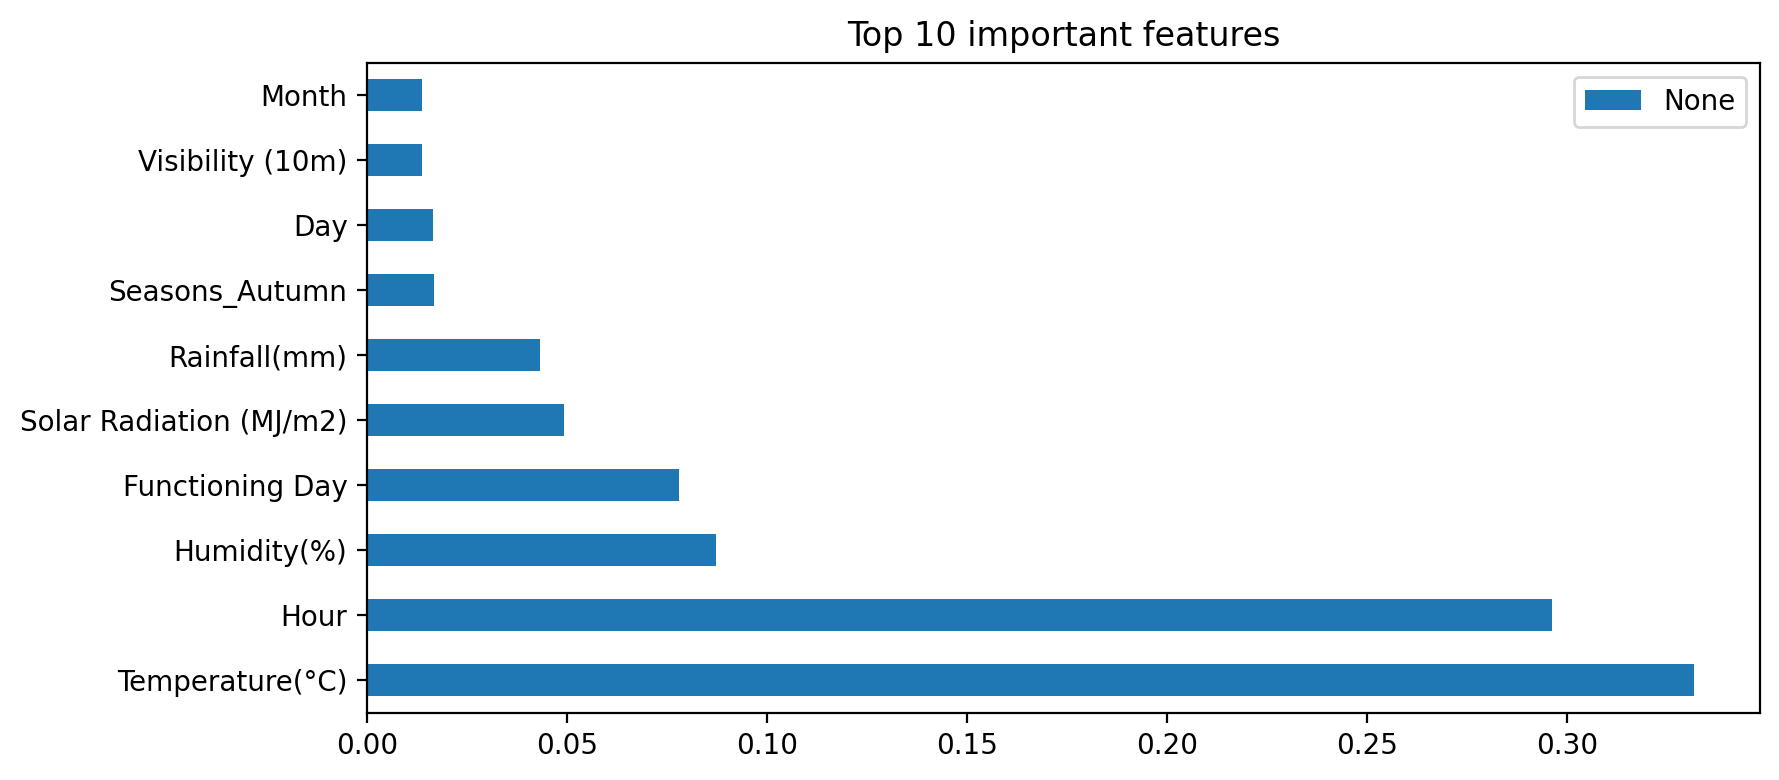

In [ ]:
plt.figure(figsize=(9,4),dpi=200)
featureimp.nlargest(10).plot(kind='barh')
plt.title('Top 10 important features')
plt.legend()
plt.tight_layout()
plt.show()

# 
--> The above plot show the top 10 important features with respect to the target variable. So from that we can say that         'Temperature(°C)' is the most important feature with respect to the target variable followed by 'Hour' and the least in      top 10 is Visibility(10m).

# Conclusions:-

1) From the above model we can say that GradientBoostingRegressor is the best performing model with R2_Score of 92.9%      followed by RandomForestRegressor with R2_Score of 78.0% and simple linear regression with the regularizations such Ridge,Lasso and Electic net has no impact in the prediction with the R2_Score less than 60%.

2) From all the fratures available in the datatest Teamperature is the most important feature with respect to the number of bikes rented and the lest import feature in prediction is year_2017.

3) Number of bikes rented more in the summer season compared to the other seasons.

4) Winter is the only season in both the years i.e 2017 and 2018 in which number if bikes rented not effected compared to the other seasons.

5) More number of bikes rented in the evening time i,e between 17:00 hrs - 21:00hrs.

6) More number of bikes rented in the months of May,June and July and less number of bikes rented in the months of Jan,Feb and December.

7) Geographical or climate conditions impact much on the bikes rented such as lesser the temperature and humidity more the number of bikes rented and When the wind spees is between 2-5 bikes rented is more or less equal and beyond 5 the count increses.

8) Finally out of top 10 important features in predicting the output 5 of the features belongs to climatic conditions.
